##### Lee, Keinath, Cianfarano and Brandon (2025). Identifying representational structure in CA1 to benchmark theoretical models of cognitive mapping. Neuron 113(2): 307-320. https://doi.org/10.1016/j.neuron.2024.10.027

In this notebook, we will run analyses and generate plots for panels from Figure 3, including the partitioned representational similarity matrix (RSM) for three heuristic models (Euclidean spatial representation, local boundary representation, and animal trajectory), and the measurement of similarity in heuristic model representations to the RSM generated from CA1 data

First load in all packages and functions for analyses and plotting

In [1]:
from utils import *
from plots import *

Define path where georepca1 folder is located, including dataset manually added to the georepca1/data folder
e.g., r"Users/YourName/Documents/georepca1"

In [2]:
p = r"" # add path to georepca1 folder here
os.chdir(p)

Define list of animal IDs

In [3]:
animals = ['QLAK-CA1-08', 'QLAK-CA1-30', 'QLAK-CA1-50', 'QLAK-CA1-51', 'QLAK-CA1-56', 'QLAK-CA1-74', 'QLAK-CA1-75']

Generate and save dictionary containing behavior and environment labels for all animals
Data is lightweight, and will be used for modelling analyses in Figures 3-4

In [4]:
# generate_behav_dict(animals, p, format="joblib")

In [5]:
rsm_parts_animals = get_rsm_partitioned_sequences(animals, p)
rsm_parts_ordered, rsm_parts_averaged = get_rsm_partitioned_similarity(rsm_parts_animals, animals,
                                                                       False, False)
behav_dict = joblib.load(os.path.join(p, "data", "behav_dict"))
envs = behav_dict[animals[0]]["envs"][:11]

QLAK-CA1-08
QLAK-CA1-30
QLAK-CA1-50
QLAK-CA1-51
QLAK-CA1-56
QLAK-CA1-74
QLAK-CA1-75


### Figure 3A-C
Simulate predictions with RSA method using heuristic models of cognitive mapping
Three heuristic models will be based on similarity in Euclidean space, local boundaries, and animal trajectory

In [7]:
euc_similarity = get_euclidean_similarity_partitioned(envs)
bound_similarity = get_boundary_similarity_partitioned(envs)
transition_similarity = get_traj_similarity_partitioned(animals, envs, p)

Loading preprocessed data for animal QLAK-CA1-08


Calculating transition matrices across 31 days: 100%|██████████| 31/31 [00:00<00:00, 45.10it/s]


Loading preprocessed data for animal QLAK-CA1-30


Calculating transition matrices across 31 days: 100%|██████████| 31/31 [00:00<00:00, 42.94it/s]


Loading preprocessed data for animal QLAK-CA1-50


Calculating transition matrices across 31 days: 100%|██████████| 31/31 [00:00<00:00, 44.68it/s]


Loading preprocessed data for animal QLAK-CA1-51


Calculating transition matrices across 21 days: 100%|██████████| 21/21 [00:00<00:00, 51.10it/s]


Loading preprocessed data for animal QLAK-CA1-56


Calculating transition matrices across 31 days: 100%|██████████| 31/31 [00:00<00:00, 46.31it/s]


Loading preprocessed data for animal QLAK-CA1-74


Calculating transition matrices across 31 days: 100%|██████████| 31/31 [00:00<00:00, 45.69it/s]


Loading preprocessed data for animal QLAK-CA1-75


Calculating transition matrices across 31 days: 100%|██████████| 31/31 [00:00<00:00, 45.08it/s]


### Figure 3D
Plot partitioned RSM results for Euclidean, local boundary, and animal trajectory heuristic models

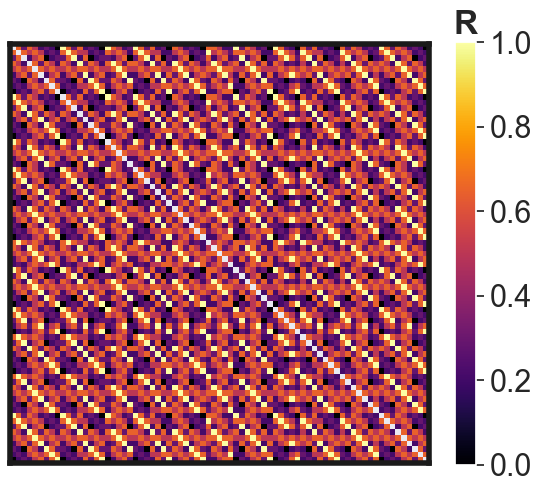

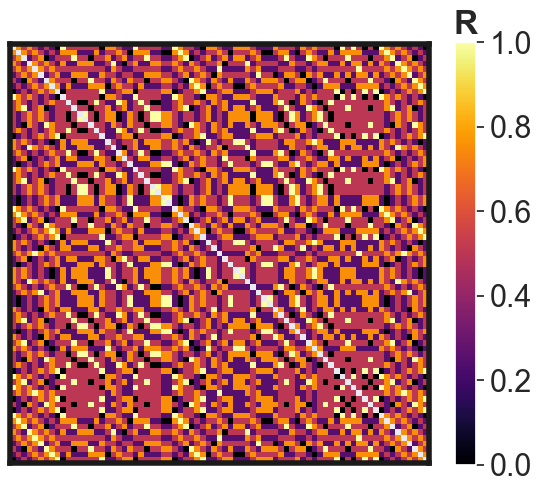

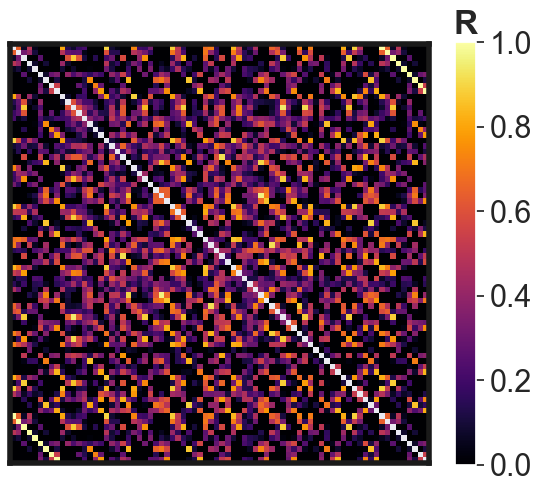

In [8]:
fig_d1 = plot_rsm_parts_averaged(euc_similarity, vmin=0, vmax=1.)
fig_d2 = plot_rsm_parts_averaged(bound_similarity, vmin=0, vmax=1.)
fig_d3 = plot_rsm_parts_averaged(transition_similarity, vmin=0., vmax=1.)

### Figure 3E
Calculate similarity to true CA1 RSM result for each model, along with noise ceiling minmax

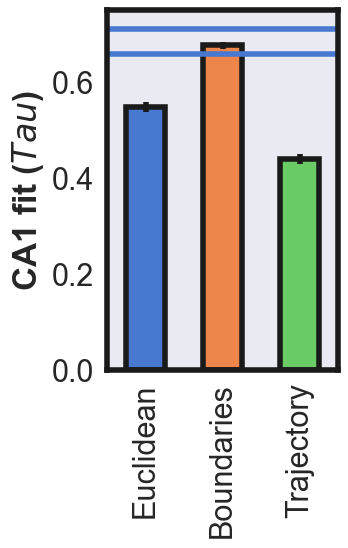

In [10]:
noise_margin_agg, rsm_mask_agg = get_noise_margin(rsm_parts_ordered)
# get bootstrap fits for each heuristic model
euc_fit, euc_se, euc_p_val = get_rsm_fit_bootstrap(rsm_parts_averaged,
                                                   euc_similarity)
bound_fit, bound_se, bound_p_val = get_rsm_fit_bootstrap(rsm_parts_averaged,
                                                   bound_similarity)
traj_fit, traj_se, traj_p_val = get_rsm_fit_bootstrap(rsm_parts_averaged,
                                                   transition_similarity)

fig_e = plot_heuristic_model_fits(euc_fit, euc_se, bound_fit, bound_se, traj_fit, traj_se,
                                  noise_margin_agg)